This program will use Natural Language Processing to extract relevant
words from Amazon product reviews and conduct sentiment analysis on them.
Review text will be cleaned and stop words removed for more precise
analysis.

In [2]:
import spacy
from  textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nlp = spacy.load("en_core_web_md")

lang_process : This function will take in text, separate it into tokens, and remove
stop words and punctuation, before rejoining as a string ready for 
sentiment analysis.

In [3]:
def lang_process(sentence):
    doc = nlp(sentence)
    return ' '.join([token.text.lower().strip() for token in doc \
                    if not(token.is_stop or token.is_punct)])

senti_process : This function will perform sentiment analysis on processed reviews,
returning values for the polarity and resulting predicted sentiment.

In [4]:
def senti_process(review):
    blob = TextBlob(review)
    polarity = blob.polarity
    if polarity >= 0.5:
        sentiment = "Strongly positive"
    elif polarity > 0:
        sentiment = "Mildly positive"
    elif polarity <= -0.5:
        sentiment = "Strongly negative"
    elif polarity < 0:
        sentiment = "Mildly negative"
    else:
        sentiment = "Neutral"
    return [polarity, sentiment]

In [80]:
# Loading the data set.
df = pd.read_csv("amazon_product_reviews.csv", low_memory=False)
print(df.shape)
df.head()


(34660, 21)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


This section of code isolates the reviews text data into a new dataframe.
New columns are then created for each process conducted on the reviews:
cleaning, calculating polarity, and predicting sentiment.

In [69]:
# Null values removed as review text is isolated in a new data 
# frame and column renamed.
reviews_data = pd.DataFrame(df['reviews.text'].dropna())
reviews_data.rename(columns = {
                        'reviews.text' : 'raw_review'
                                }, inplace=True)

# Each review is cleaned and stop-words removed.
reviews_data['prepped'] = [lang_process(line) for \
                                line in reviews_data['raw_review']]
# Each clean review has it's polarity calculated.
reviews_data['polarity'] = [senti_process(line)[0] for \
                                line in reviews_data['prepped']]
# Each clean review has it's sentiment predicted based on polarity score.
reviews_data['sentiment'] = [senti_process(line)[1] for \
                                line in reviews_data['prepped']]
reviews_data.head()

,raw_review,prepped,polarity,sentiment,raw_polarity
0,This product so far has not disappointed. My c...,product far disappointed children love use lik...,-0.050000,Mildly negative,0.325000
1,great for beginner or experienced person. Boug...,great beginner experienced person bought gift ...,0.800000,Strongly positive,0.800000
2,Inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrille...,0.600000,Strongly positive,0.600000
3,I've had my Fire HD 8 two weeks now and I love...,fire hd 8 weeks love tablet great value prime ...,0.413095,Mildly positive,0.374583
4,I bought this for my grand daughter when she c...,bought grand daughter comes visit set user ent...,0.385417,Mildly positive,0.368056


This section adds columns to the review data frame that contain polarity
and sentiment values that have been calcuated from the raw review text.
This is for comparison with pre-processed reviews that have had stop
words removed to see is there is a change in sentiment.

In [84]:
# Each raw review has its polarity calculated.
reviews_data['raw_polarity'] = [senti_process(line)[0] for \
                                line in reviews_data['raw_review']]
# Each raw review has its sentiment predicted based on polarity score.
reviews_data['raw_sentiment'] = [senti_process(line)[1] for \
                                line in reviews_data['raw_review']]
reviews_data.head()

,raw_review,prepped,polarity,sentiment,raw_polarity,raw_sentiment
0,This product so far has not disappointed. My c...,product far disappointed children love use lik...,-0.050000,Mildly negative,0.325000,Mildly positive
1,great for beginner or experienced person. Boug...,great beginner experienced person bought gift ...,0.800000,Strongly positive,0.800000,Strongly positive
2,Inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrille...,0.600000,Strongly positive,0.600000,Strongly positive
3,I've had my Fire HD 8 two weeks now and I love...,fire hd 8 weeks love tablet great value prime ...,0.413095,Mildly positive,0.374583,Mildly positive
4,I bought this for my grand daughter when she c...,bought grand daughter comes visit set user ent...,0.385417,Mildly positive,0.368056,Mildly positive


Here, the rows which changed sentiment are isolated and counted,
and the percentage of the dataset they make up is calculated.

In [95]:
# Selecting rows that change sentiment category between raw and
# processed reviews.
change = reviews_data.loc[reviews_data.sentiment != reviews_data.raw_sentiment]
# Calculating the percentage of the data set affected.
percent_change = round(((len(change)) / (len(reviews_data))) * 100, 2)
print(f'''
Number of rows affected by stop word removal: {len(change)}
Percentage of data set affected (excluding NaN) : {percent_change}%
''')


34659
4270

Number of rows affected by stop word removal: 4270
Percentage of data set affected (excluding NaN) : 12.32%



In [85]:
# Here we can visually compare original text with the prepped text,
# polarity score, and sentiment.
print(reviews_data.loc[52])


raw_review       I purchased the kindle fire because I needed a...
prepped          purchased kindle fire needed entertainment dev...
polarity                                                  0.151488
sentiment                                          Mildly positive
raw_polarity                                               0.12119
raw_sentiment                                      Mildly positive
Name: 52, dtype: object


This section produces a graph to show the frequency count of each sentiment
category, for processed and clean reviews. Further down, a plot is added to
show the frequencies of sentiment calculated on raw reviews for comparison.

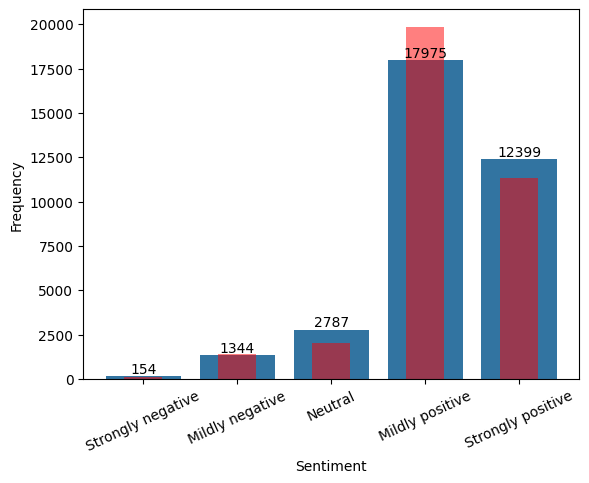

In [93]:
x = ['Mildly positive', 'Strongly positive', 'Neutral', 'Mildly negative', 'Strongly negative']
y = reviews_data['sentiment'].value_counts()

graph = sns.barplot(x=x,
                    y=y,
                    order=[
                        'Strongly negative',
                        'Mildly negative',
                        'Neutral',
                        'Mildly positive',
                        'Strongly positive'])

# Bar labels are added here to show the counts.
for value in graph.containers:
    graph.bar_label(value,)
# X axis labels rotated to look better.
graph.tick_params(axis='x', labelrotation=25)

plt.xlabel("Sentiment")
plt.ylabel("Frequency")

# The raw review sentiment frequencies are added here.
y2 = reviews_data['raw_sentiment'].value_counts()
plt.bar(x, y2, color='r', alpha=0.5, width=0.4)
plt.show()

In [109]:
# Checking similarity of reviews.
chosen_review_1 = nlp(reviews_data['raw_review'][0])
chosen_review_2 = nlp(reviews_data['raw_review'][1])

similarity = chosen_review_1.similarity(chosen_review_2)

print(similarity)

0.8094778342525452
